# Advanced Transformations - Core Assignment 3

- Name: Tyler Schelling
- Date: 12/22/2022

## The Task

1. Clean the files and combine them into one final DataFrame.
- This dataframe should have the following columns:
    - Hero (Just the name of the Hero)
    - Publisher
    - Gender
    - Eye color
    - Race
    - Hair color
    - Height (numeric)
    - Skin color
    - Alignment
    - Weight (numeric)
    - Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
        - Agility
        - Flight
        - Superspeed
        - etc.

Hint: There is a space in "100 kg" or "52.5 cm"

2. Use your combined DataFrame to answer the following questions.

    1. Compare the average weight of super powers who have Super Speed to those who do not.
    2. What is the average height of heroes for each publisher?
    
    
Source: https://www.kaggle.com/datasets/claudiodavi/superhero-set

## Import Libraries

In [33]:
import pandas as pd
import numpy as np
import json, os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Download Data

### Superhero Info

In [2]:
superhero_info_df = pd.read_csv("Data/superhero_info.csv")

In [3]:
superhero_info_df.head(3)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"


In [4]:
superhero_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


### Superhero Powers

In [5]:
superhero_powers_df = pd.read_csv("Data/superhero_powers.csv")

In [6]:
superhero_powers_df.head(3)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."


In [7]:
superhero_powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


## Separate Hero Name

In [8]:
superhero_info_df['Hero|Publisher'].head(2)

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
Name: Hero|Publisher, dtype: object

In [9]:
## adding expand=True
superhero_info_df[['Hero Name', 'Publisher']] = superhero_info_df\
    ['Hero|Publisher'].str.split('|',expand=True)
superhero_info_df = superhero_info_df.drop(columns = ['Hero|Publisher'])
superhero_info_df.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero Name,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics


## Separate Measurements

In [10]:
print(type(superhero_info_df.loc[0, 'Measurements']))
superhero_info_df.loc[0, 'Measurements']

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [11]:
superhero_info_df['Measurements'] = superhero_info_df['Measurements'].str\
            .replace("'", '"')
superhero_info_df['Measurements'] = superhero_info_df['Measurements']\
            .apply(json.loads)
superhero_info_df.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero Name,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics


In [12]:
print(type(superhero_info_df.loc[0, 'Measurements']))
superhero_info_df.loc[0, 'Measurements']

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [13]:
measurements = superhero_info_df['Measurements'].apply(pd.Series)
measurements

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [14]:
superhero_info_df = pd.concat((superhero_info_df, measurements), axis = 1)
superhero_info_df = superhero_info_df.drop(columns = ['Measurements'])

In [15]:
to_replace = [' cm',' kg']

for char in to_replace:
    superhero_info_df['Height'] = superhero_info_df['Height']\
                    .str.replace(char, '', regex=False)
    superhero_info_df['Weight'] = superhero_info_df['Weight']\
                    .str.replace(char, '', regex=False)

columns = ['Height', 'Weight']
for col in columns:
    superhero_info_df[col] = pd.to_numeric(superhero_info_df[col])

In [16]:
superhero_info_df = superhero_info_df.reindex(columns=[\
            'Hero Name', 'Publisher', 'Gender', 'Eye color',\
            'Race', 'Hair color', 'Height', 'Skin color',\
            'Alignment', 'Weight'])
superhero_info_df.head(3)

,Hero Name,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0


## Combining Dataframes

In [17]:
hero_powers_filter = superhero_powers_df['hero_names']\
            .isin(superhero_info_df['Hero Name'])

superhero_powers_df = superhero_powers_df[hero_powers_filter]
superhero_powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 1 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  455 non-null    object
 1   Powers      455 non-null    object
dtypes: object(2)
memory usage: 10.7+ KB


In [18]:
superhero_powers_df = superhero_powers_df.rename(columns =\
                                    {'hero_names':'Hero Name'})

In [19]:
merged_superhero_df = pd.merge(superhero_info_df, superhero_powers_df,\
                          on='Hero Name', how='inner')
merged_superhero_df.head(3)

,Hero Name,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,Powers
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0,"Accelerated Healing,Durability,Longevity,Super..."
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,"Agility,Accelerated Healing,Cold Resistance,Du..."
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0,Lantern Power Ring


## OHE the Powers Column

In [20]:
print(type(merged_superhero_df.loc[0,'Powers']))
merged_superhero_df.loc[0,'Powers']

<class 'str'>


'Accelerated Healing,Durability,Longevity,Super Strength,Stamina,Camouflage,Self-Sustenance'

In [21]:
split_powers_df = merged_superhero_df['Powers'].str.split(",")

In [22]:
exploded = split_powers_df.explode('Powers')
exploded.head(3)

0    Accelerated Healing
1             Durability
2              Longevity
Name: Powers, dtype: object

In [23]:
## saving the unique values from the exploded column
cols_to_make = exploded.dropna().unique()
cols_to_make

array(['Accelerated Healing', 'Durability', 'Longevity', 'Super Strength',
       'Stamina', 'Camouflage', 'Self-Sustenance', 'Agility',
       'Cold Resistance', 'Underwater breathing', 'Marksmanship',
       'Weapons Master', 'Intelligence', 'Telepathy', 'Immortality',
       'Reflexes', 'Enhanced Sight', 'Sub-Mariner', 'Lantern Power Ring',
       'Super Speed', 'Invulnerability', 'Animation', 'Super Breath',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Molecular Manipulation',
       'Heat Resistance', 'Matter Absorption', 'Stealth', 'Flight',
       'Power Suit', 'Energy Blasts', 'Energy Beams', 'Power Cosmic',
       'Heat Generation', 'Danger Sense', 'Teleportation', 'Phasing',
       'Force Fields', 'Hypnokinesis', 'Energy Manipulation',
       'Invisibility', 'Enhanced Senses', 'Jump', 'Substance Secretion',
       'Natural Weapons', 'Wallcrawling', 'Vision - Thermal',
       'Power Augmentation', 'Cryokinesis', 'Dupli

In [24]:
for col in cols_to_make:
    merged_superhero_df[col] = merged_superhero_df['Powers'].str.contains(col)
merged_superhero_df.head()

,Hero Name,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,...,Hair Manipulation,Weather Control,Nova Force,Odin Force,Phoenix Force,Power Sense,Qwardian Power Ring,Melting,Changing Armor,Terrakinesis
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Marvel Comics,Male,green,Human / Radiation,No Hair,203.0,Unknown,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Marvel Comics,Male,blue,Human,No Hair,193.0,Unknown,bad,122.0,...,False,False,False,False,False,False,False,False,False,False


## Explore the Merged Dataframe

In [47]:
speed_weight = merged_superhero_df.groupby('Super Speed')['Weight'].mean()\
                    .sort_values(ascending = False).round(1)
speed_weight

Super Speed
True     129.4
False    101.8
Name: Weight, dtype: float64

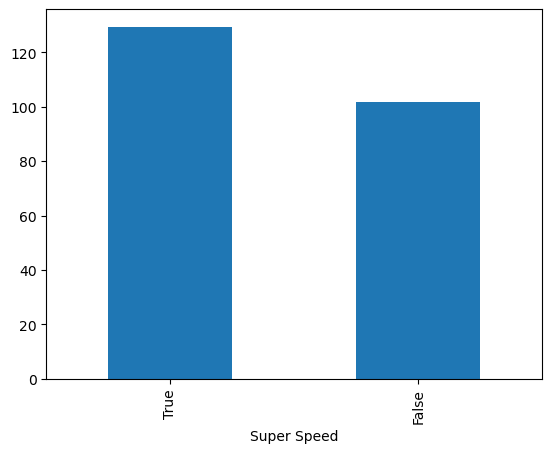

In [48]:
speed_weight.plot(kind ='bar');

In [45]:
publish_height = merged_superhero_df.groupby('Publisher')['Height'].mean()\
                    .sort_values(ascending = False).round(1)
publish_height

Publisher
Image Comics         211.0
Marvel Comics        191.5
DC Comics            181.9
Star Trek            181.5
Team Epic TV         180.8
Unknown              178.0
Dark Horse Comics    176.9
Shueisha             171.5
George Lucas         159.6
Name: Height, dtype: float64

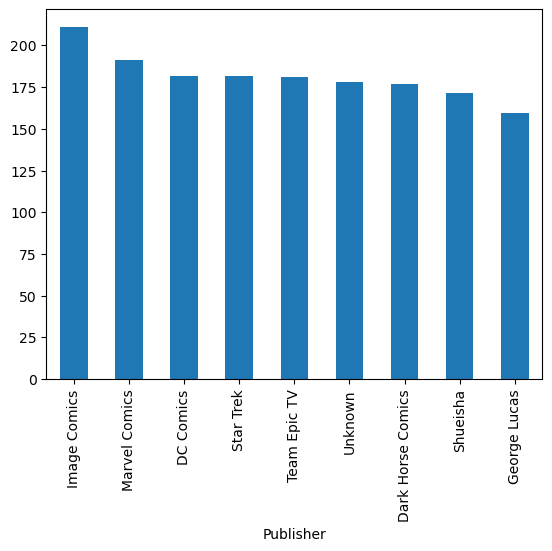

In [46]:
publish_height.plot(kind = 'bar');